In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib_themplate import *
from tensorflow.keras.layers import Dropout

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.keras.backend.set_floatx('float64')


2025-07-21 13:23:32.110626: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-21 13:23:32.193486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753079012.229019   14107 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753079012.239551   14107 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753079012.313959   14107 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
df = pd.read_csv("DataSet/ai_assistant_usage_student_life.csv")

In [4]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [5]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [9]:
df.shape

(10000, 11)

In [10]:
df.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

In [11]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [12]:
# fig, ax = create_modern_plot(df['SessionID'], df['SatisfactionRating'], 
#                            title="StudentLevel vs TaskType",
#                            x_label="X Values",
#                             y_label="Y Values",
#                            plot_type="scatter",  # or "scatter", "bar", "area"
#                            color_scheme="modern")  # or "gradient", "minimal"

In [13]:
df['TaskType'].unique()
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

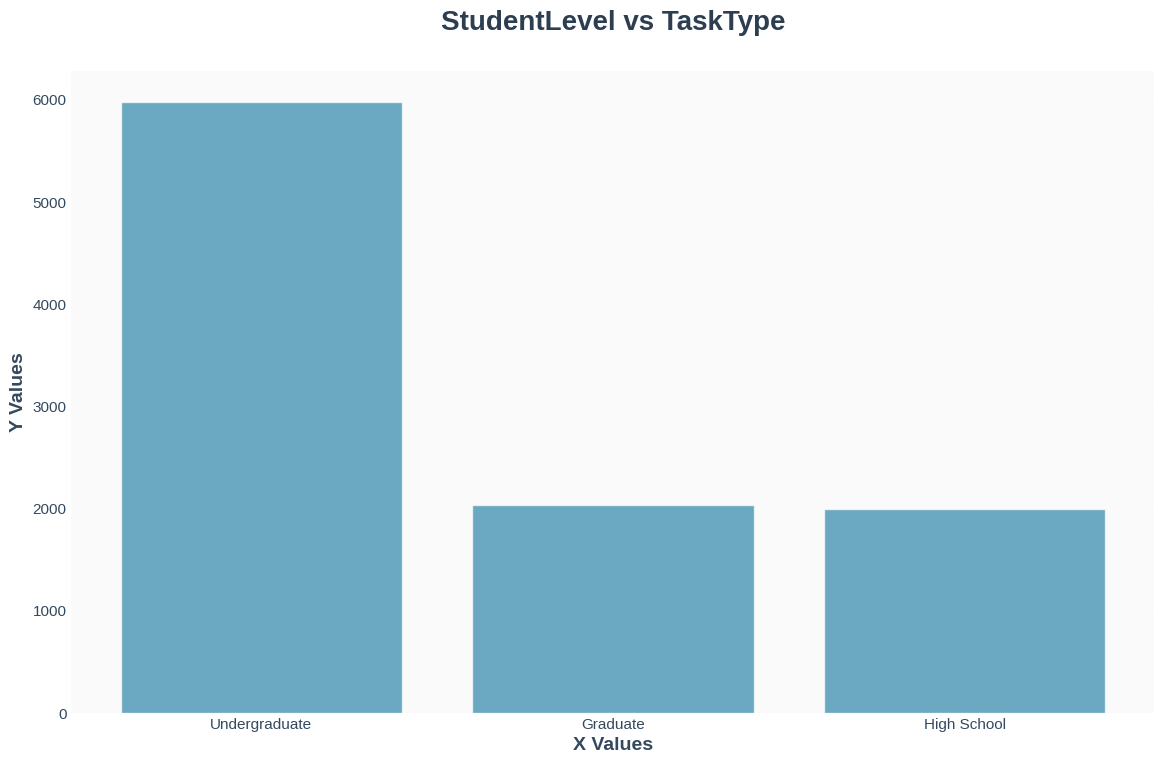

In [14]:
# 1. Distribution of Student Levels
fig, ax = create_modern_plot(df['StudentLevel'].unique(), df['StudentLevel'].value_counts(),
                           title="StudentLevel vs TaskType",
                           x_label="X Values",
                            y_label="Y Values",
                           plot_type="bar",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

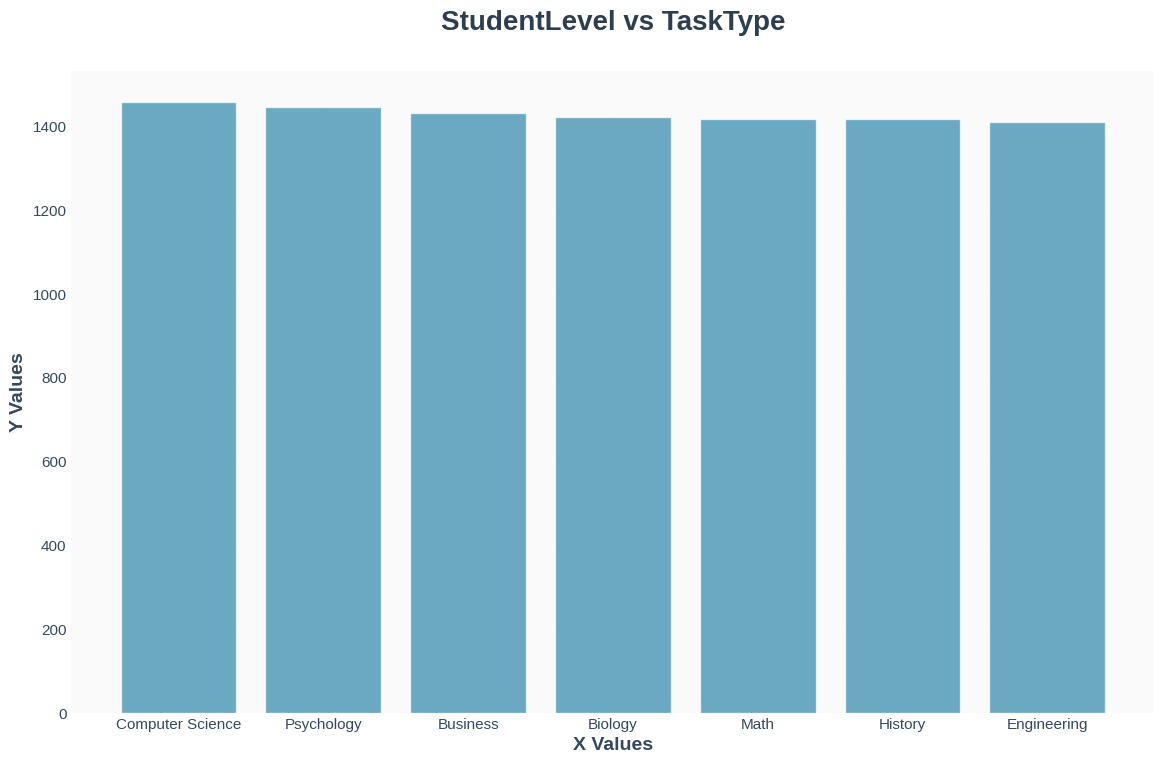

In [15]:
# 2. Sessions by Discipline
fig, ax = create_modern_plot(df['Discipline'].unique(), df['Discipline'].value_counts(),
                           title="StudentLevel vs TaskType",
                           x_label="X Values",
                            y_label="Y Values",
                           plot_type="bar",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

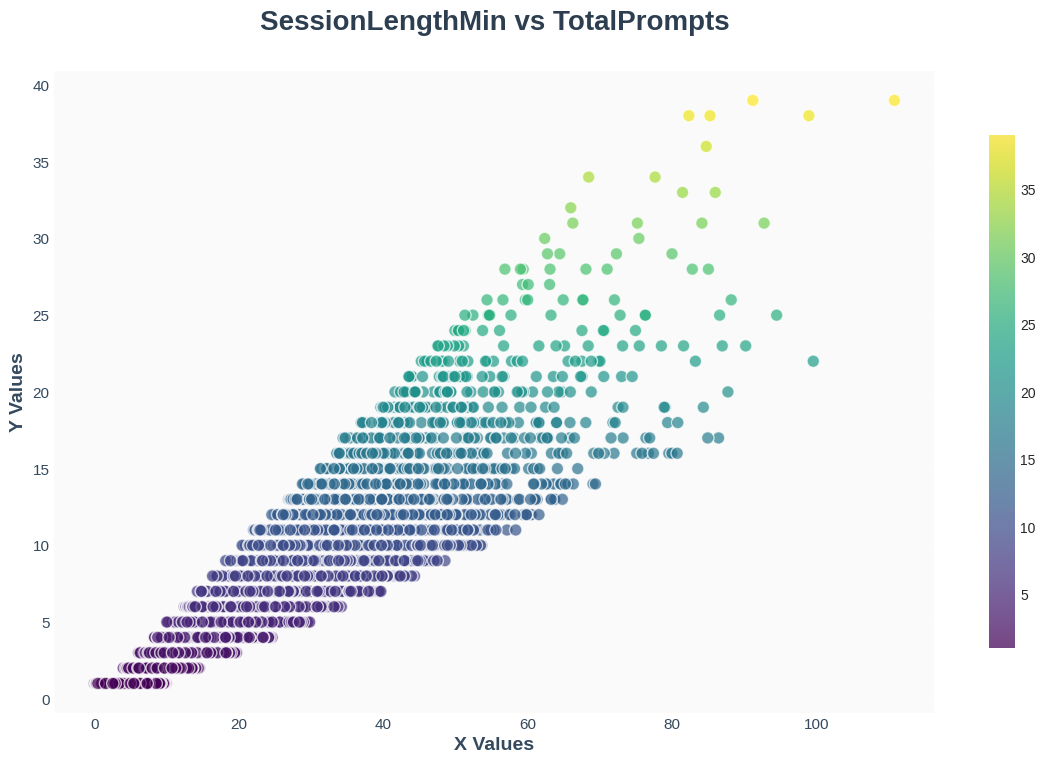

In [16]:
# 5. Session Length vs Total Prompts (Scatter)
fig, ax = create_modern_plot(df['SessionLengthMin'],df['TotalPrompts'],
                           title="SessionLengthMin vs TotalPrompts",
                           x_label="X Values",
                            y_label="Y Values",
                           plot_type="scatter",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

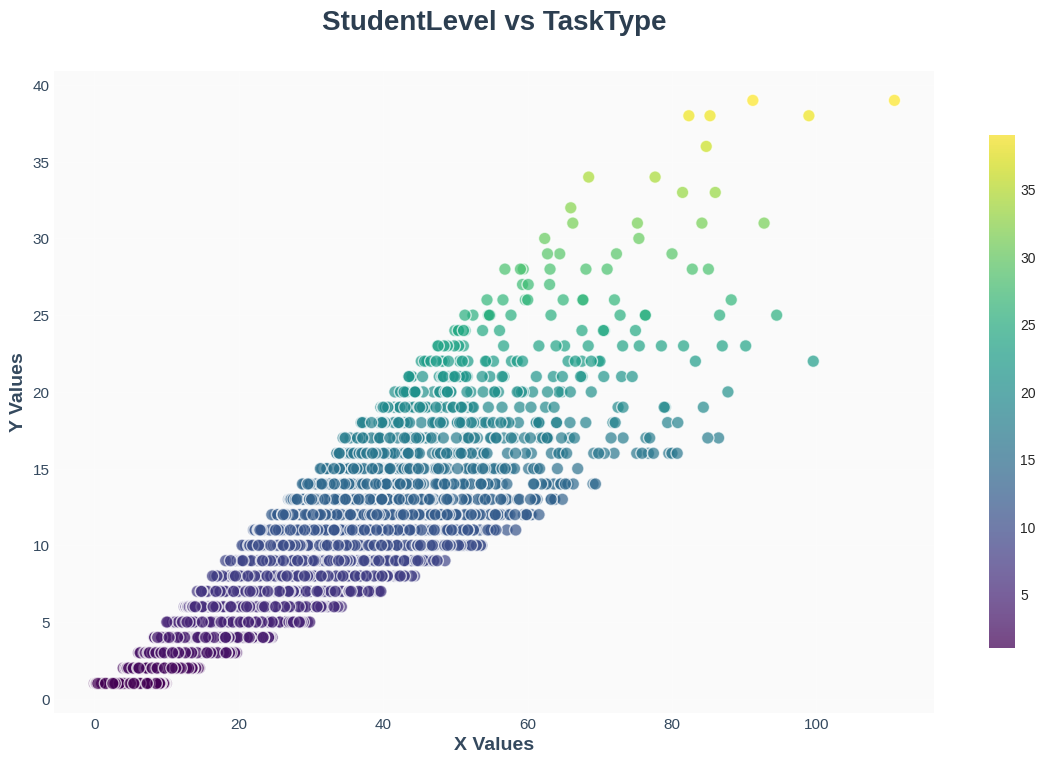

In [17]:
# 5. Session Length vs Total Prompts (Scatter)
fig, ax = create_modern_plot(df['SessionLengthMin'],df['TotalPrompts'],
                           title="StudentLevel vs TaskType",
                           x_label="X Values",
                            y_label="Y Values",
                           plot_type="scatter",  # or "scatter", "bar", "area"
                           color_scheme="modern")  # or "gradient", "minimal"

In [18]:
df.drop('SessionID', axis=1, inplace=True)

In [19]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['SessionMonth'] = df['SessionDate'].dt.month
df['SessionWeekday'] = df['SessionDate'].dt.weekday
df.drop('SessionDate', axis=1, inplace=True)

In [20]:
# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [21]:
cat_cols

['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']

In [22]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [23]:
df['FinalOutcome'].unique()

array([0, 3, 1, 2])

In [24]:
# Separate features and target
X = df.drop('FinalOutcome', axis=1).to_numpy()
y = df['FinalOutcome'].to_numpy()

In [25]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
       incorrect+=int((y[i]!=yhat[i]))
    cerr=incorrect/m
    return(cerr)

In [26]:
# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (5000, 10) X_cv.shape: (4000, 10) X_test.shape: (1000, 10)


In [27]:
y_train

array([0, 3, 3, ..., 0, 3, 0])

In [28]:
X_train

array([[0, 2, 1.45, ..., 4.2, 1, 4],
       [0, 2, 14.18, ..., 5.0, 1, 5],
       [2, 5, 9.99, ..., 1.8, 5, 6],
       ...,
       [1, 1, 21.18, ..., 4.9, 10, 0],
       [0, 6, 8.95, ..., 5.0, 9, 5],
       [2, 2, 33.03, ..., 2.0, 2, 6]], dtype=object)

In [29]:
#Complex Model
tf.random.set_seed(1234)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping 

model = Sequential([
    Dense(120, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(40, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4, activation='linear')  # For 4-class classification
], name="Complex")

2025-07-21 13:23:34.759614: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2025-07-21 13:23:34.759634: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-21 13:23:34.759637: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: nanashi
2025-07-21 13:23:34.759639: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: nanashi
2025-07-21 13:23:34.759748: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 535.247.1
2025-07-21 13:23:34.759759: I external/local_xla/xla/stream_executor/cuda/cud

In [30]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']  # Optional, but good for monitoring
)

In [31]:
# Early stopping callback (optional but recommended)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

In [32]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')
X_cv = X_cv.astype('float32')
y_cv = y_cv.astype('int32')
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')

In [33]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=1000,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/1000
 39/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 2.0806 

2025-07-21 13:23:35.866866: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.867519: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.867545: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.870034: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.870058: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.921529: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.923020: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.923080: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.924473: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:35.924526: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2626 - loss: 1.9287 - val_accuracy: 0.4442 - val_loss: 1.3629
Epoch 2/1000
 50/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss: 1.6737 

2025-07-21 13:23:36.282354: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.282462: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.282483: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.282571: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.282592: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.291324: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.291436: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.291458: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.291549: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:36.291570: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.6354 - val_accuracy: 0.4595 - val_loss: 1.3157
Epoch 3/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3920 - loss: 1.4887 - val_accuracy: 0.4708 - val_loss: 1.2751
Epoch 4/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4038 - loss: 1.3899 - val_accuracy: 0.4688 - val_loss: 1.2615
Epoch 5/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4317 - loss: 1.3643 - val_accuracy: 0.4670 - val_loss: 1.2492
Epoch 6/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4293 - loss: 1.3528 - val_accuracy: 0.4680 - val_loss: 1.2395
Epoch 7/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4431 - loss: 1.3131 - val_accuracy: 0.4697 - val_loss: 1.2323
Epoch 8/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4445 - loss: 1.2933 - val_accuracy: 0.4692 - val_loss: 1.2257
Epoch 9/1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.2618 - val_accuracy:

In [34]:
model.summary()

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,254 (158.23 KB)

 Trainable params: 6,644 (51.91 KB)

 Non-trainable params: 320 (2.50 KB)

 Optimizer params: 13,290 (103.83 KB)

In [35]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
test_cerr_complex = eval_cat_err(y_test, model_predict(X_test))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")
print(f"categorization error, test,     complex model: {cv_cerr_complex:0.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
  1/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

2025-07-21 13:23:58.781460: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.781640: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.781661: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.781837: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.781865: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.785831: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.786130: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.786159: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.786681: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.786702: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:58.864601: W tensorflow/core/util/util.cc:163] Not handling typ

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
categorization error, training, complex model: 0.492
categorization error, cv,       complex model: 0.526
categorization error, test,     complex model: 0.526


In [36]:
#Regularixation
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
    Dense(units=120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),    
    Dense(units=40,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(units=4,activation='linear')    
        
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    ### START CODE HERE ### 
)

In [37]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=100
)
# END UNIT TEST

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - loss: 6.7202 
Epoch 2/100
  1/157 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.6841

2025-07-21 13:23:59.570628: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.570701: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.570725: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.570771: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.570794: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.590621: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.590694: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.590717: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.590921: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:23:59.590942: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 2.2603
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.5929
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 1.4010
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.3143
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 1.2690
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 1.2438
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 1.2284
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 1.2194
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 1.2132
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 1.2092
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 1.2064
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 1.2043
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1.2031
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1.2022
Epoch 16/100
157/157 ━━━━━

In [38]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)

In [39]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


2025-07-21 13:24:13.101888: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.102018: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.102041: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.102150: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.102172: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.103960: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.104080: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.104101: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.104206: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.104227: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.158151: W tensorflow/core/util/util.cc:163] Not handling typ

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
categorization error, training, regularized: 0.531, complex model: 0.492
categorization error, cv,       regularized: 0.515, complex model: 0.526


In [40]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ###    
    Dense(units=6,activation='relu'),
    Dense(units=4,activation='linear')    
        
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    ### START CODE HERE ### 
)

In [41]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=100
)
# END UNIT TEST

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 2.6958
Epoch 2/100
102/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 1.6436

2025-07-21 13:24:13.663701: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.663771: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.663796: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.677690: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.677758: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-21 13:24:13.677781: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 1.6298
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 1.4142
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 1.2922
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 1.2359
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.2144
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 1.2023
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 1.1931
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1.1855
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 1.1798
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 1.1742
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.1698
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 1.1650
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 1.1608
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1.1567
Epoch 16/100
157/157 ━━━━━

KeyboardInterrupt: 

In [ ]:
model_s.summary()


Model: "Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284 (2.22 KB)

 Trainable params: 94 (752.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190 (1.48 KB)

In [ ]:
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
categorization error, training, simple model, 0.521, complex model: 0.496
categorization error, cv,       simple model, 0.512, complex model: 0.517


2025-07-19 19:37:41.274579: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.274711: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.274733: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.276058: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.276180: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.276202: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.323214: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.323365: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.323399: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.324764: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-07-19 19:37:41.324907: W tensorflow/core/util/util.cc:163] Not handling typ

In [ ]:
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

categorization error, training, regularized: 0.531, simple model, 0.521, complex model: 0.496
categorization error, cv,       regularized: 0.515, simple model, 0.512, complex model: 0.517
